Import packages and functions

In [1]:
import sys
sys.path.append('../../../')


In [2]:
from scripts.forecast import DataGenerator, make_photoz_bin_edges, compare_fisher_matrices 
from scripts.luminosity_functions import def_agn_xlf, XrayLuminosityFunction, ldde_hasinger_soft_cutoff, def_cosmo
import matplotlib
from scripts.utils import np, plt, set_mpl
set_mpl()
%matplotlib inline


Set up parameters of AGN population

In [3]:
fiducial_params = {'Omega_c': 0.25, 'Omega_b': 0.05,
                   'h': 0.7, 'sigma8': 0.8, 'n_s': 0.96,
                   'transfer_function': 'boltzmann_camb',
                   'baryons_power_spectrum': 'nobaryons',
                   'matter_power_spectrum': 'linear'}

fsky = 0.658
powspec_pars_dict_agn = {
    'slim': 1e-14,
    'l_min': 10,
    'l_max': 500,
    'log_bins': 41,
    'fsky': fsky,
    'has_rsd': True,
    'density_multiplier': 1.3,
    'camb_llimber': 110,
    'xlf': def_agn_xlf,
    'use_camb': True,
    'delta_i': 3,
    'remove_ignored_cells': True,
}



zmin_agn = 0.5
zmax_agn = 2.5
sigma0_agn = 0.05
f_fail_agn = 0.02
bins_agn = make_photoz_bin_edges(zmin_agn, zmax_agn, k=1, sigma_0=sigma0_agn)

powspec_pars_dict_agn['sigma_0'] = sigma0_agn
powspec_pars_dict_agn['f_fail'] = f_fail_agn

Run DataGenerator object to generate dndz, Cell, etc

Total AGN sources: 1964808 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.05, self.f_fail=0.02
calculating CAMB...
CAMB calculation time: 1.3290801048278809


calc Covariance: 100%|██████████| 171/171 [00:00<00:00, 715.18it/s]


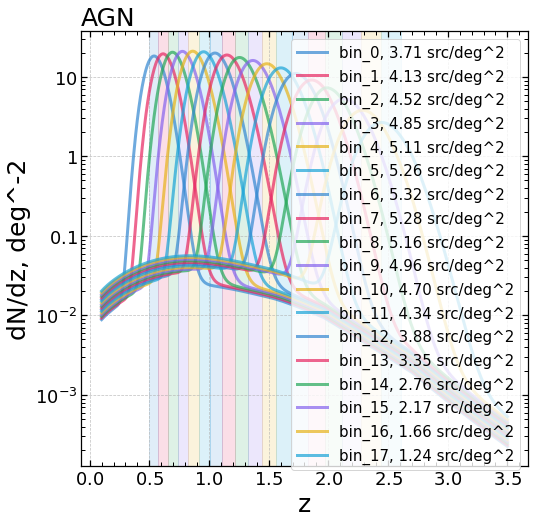

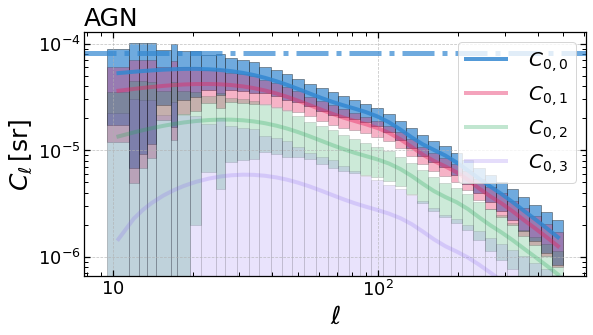

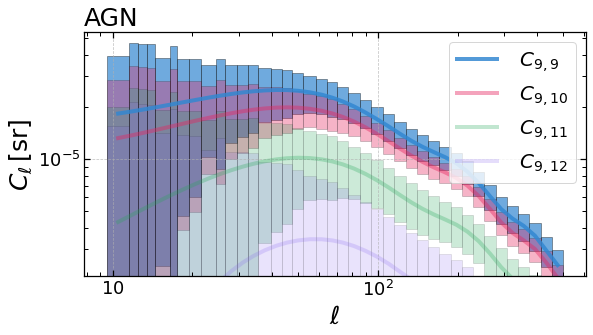

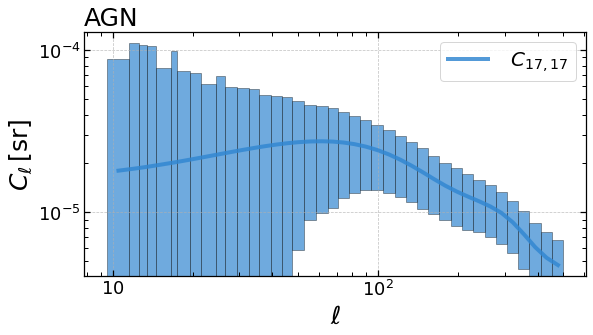

In [4]:
datagen_AGN = DataGenerator(
                                 fiducial_params=fiducial_params, set_name = 'AGN')

datagen_AGN.invoke(**powspec_pars_dict_agn, bin_left_edges=bins_agn, plot_dndz=True, plot_cell=True);
datagen_AGN.invert_cov();

Calculate the Fisher matrix

In [5]:
F = datagen_AGN.get_Fisher_matrix(jac_step = 0.001, jac_order = 2)[0]

Start Jacobian calculation (cosmological part): jac_step=0.001, jac_order=2
Finished Jacobian calculation (cosmological part) in 24.22 seconds


Plot the Fisher matrix


AGN
FoM: 2.8e+09
Omega_c: 0.250 +- 0.025 (10.2 %)
Omega_b: 0.050 +- 0.021 (41.8 %)
h: 0.700 +- 0.256 (36.6 %)
n_s: 0.960 +- 0.163 (16.9 %)
sigma_8: 0.800 +- 0.009 (1.1 %)
-------


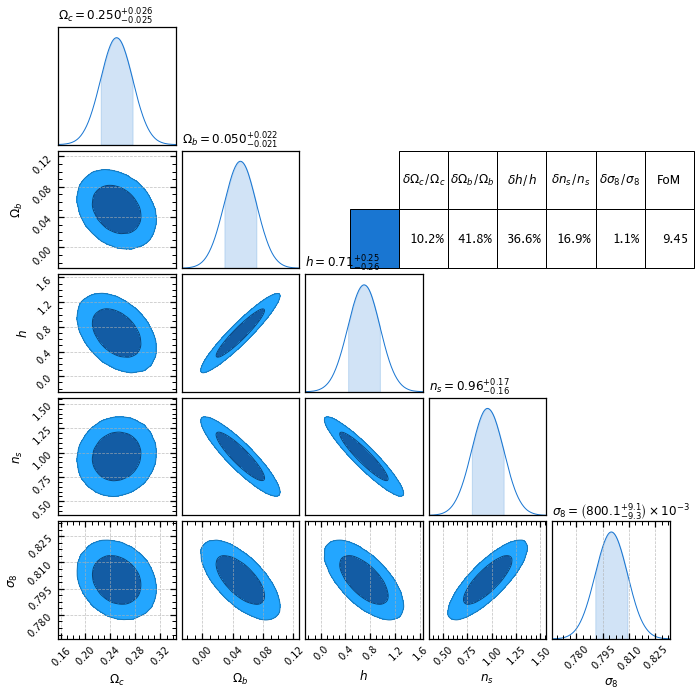

In [6]:
compare_fisher_matrices([F]);

# Calculate Fisher Marix from two DataGenerator objects

motivation is that I don't want to include AGN dark matter halo mass into the code, and will simply calculate derivative wrt to that by setting slightly different bias in DataGenerator.

At first I test that such method for,say, hubble constant $h$ returns the correct derivative

In [7]:
# fiducial_params_2 = {'Omega_c': 0.25, 'Omega_b': 0.05,
#                    'h': 0.7+0.001, 'sigma8': 0.8, 'n_s': 0.96,
#                    'transfer_function': 'boltzmann_camb',
#                    'baryons_power_spectrum': 'nobaryons',
#                    'matter_power_spectrum': 'linear'}
# datagen_AGN_2 = DataGenerator(
#                                  fiducial_params=fiducial_params_2, set_name = 'AGN')

# datagen_AGN_2.invoke(**powspec_pars_dict_agn, bin_left_edges=bins_agn, plot_dndz=True, plot_cell=True);
# #datagen_AGN_2.invert_cov();
# dCdh = datagen_AGN_2.cls_rebin_lkl - datagen_AGN.cls_rebin_lkl
# dCdh = dCdh / 0.001

# dCdh_orig = F.J[:, 2]
# np.mean(dCdh/dCdh_orig)
# plt.figure(figsize=(12,12))
# plt.plot(dCdh_orig, label='orig')
# plt.plot(dCdh, '-.',label='new')
#plt.xlim(0,100)

seems that it is a god way to calculate derivative. Lets try dCell/dM_dmh

## Varying dark matter halo mass

Total AGN sources: 1964808 at fsky=0.658[27144 deg^2]
Photo-z parameters: self.sigma_0=0.05, self.f_fail=0.02
calculating CAMB...
CAMB calculation time: 2.1671090126037598


calc Covariance: 100%|██████████| 171/171 [00:00<00:00, 466.41it/s]


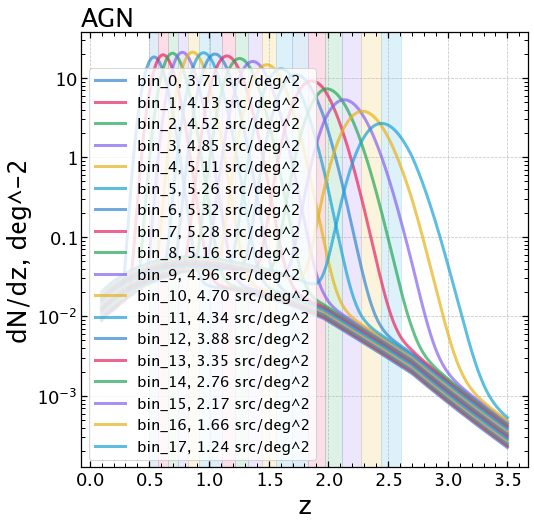

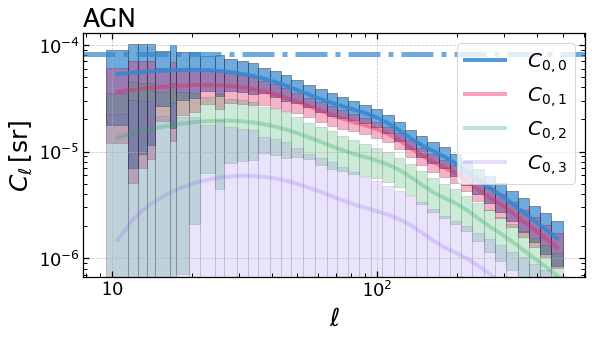

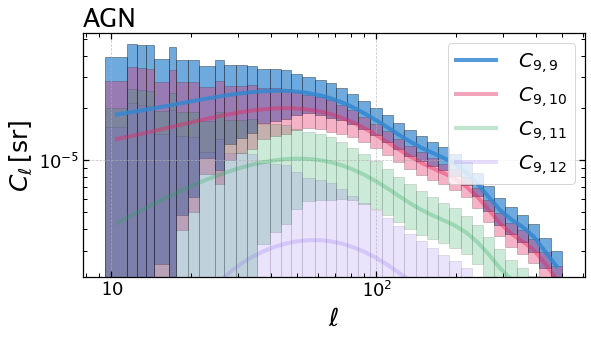

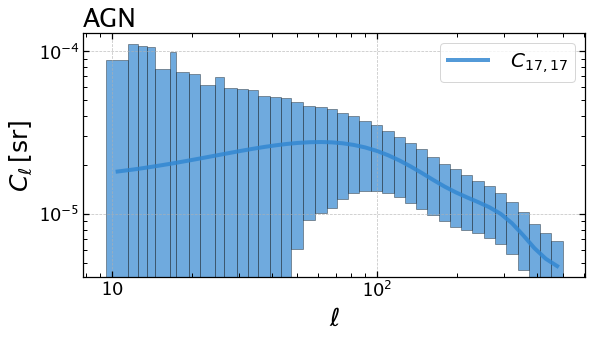

In [8]:
d_dmh = 2e13*0.01
new_dmh_mass_xlf = XrayLuminosityFunction(xlf=ldde_hasinger_soft_cutoff,
                                    cosmo=def_cosmo,
                                    k_corr_po=1.9,
                                    m_dmh=2e13+d_dmh,)



fiducial_params = {'Omega_c': 0.25, 'Omega_b': 0.05,
                   'h': 0.7, 'sigma8': 0.8, 'n_s': 0.96,
                   'transfer_function': 'boltzmann_camb',
                   'baryons_power_spectrum': 'nobaryons',
                   'matter_power_spectrum': 'linear'}

fsky = 0.658
powspec_pars_dict_agn_dmh = {
    'slim': 1e-14,
    'l_min': 10,
    'l_max': 500,
    'log_bins': 41,
    'fsky': fsky,
    'has_rsd': True,
    'density_multiplier': 1.3,
    'camb_llimber': 110,
    'xlf': new_dmh_mass_xlf,
    'use_camb': True,
    'delta_i': 3,
    'remove_ignored_cells': True,
}



zmin_agn = 0.5
zmax_agn = 2.5
sigma0_agn = 0.05
f_fail_agn = 0.02
bins_agn = make_photoz_bin_edges(zmin_agn, zmax_agn, k=1, sigma_0=sigma0_agn)

powspec_pars_dict_agn_dmh['sigma_0'] = sigma0_agn
powspec_pars_dict_agn_dmh['f_fail'] = f_fail_agn


datagen_AGN_dmh = DataGenerator(
                                 fiducial_params=fiducial_params, set_name = 'AGN')

datagen_AGN_dmh.invoke(**powspec_pars_dict_agn_dmh, bin_left_edges=bins_agn, plot_dndz=True, plot_cell=True);
datagen_AGN_dmh.invert_cov();

In [79]:
# F_3 = datagen_AGN_3.get_Fisher_matrix(jac_step = 0.0001, jac_order = 2)[0]

Start Jacobian calculation (cosmological part): jac_step=0.0001, jac_order=2
Finished Jacobian calculation (cosmological part) in 24.71 seconds


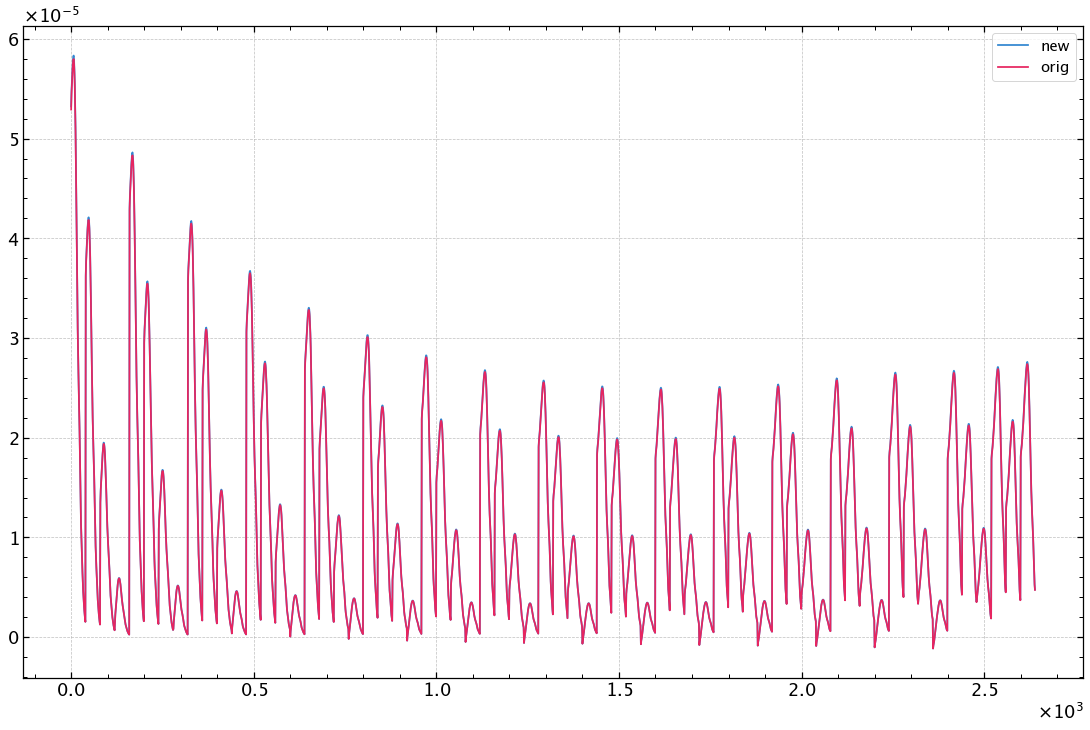

In [13]:
plt.figure(figsize=(19,12))
plt.plot(datagen_AGN_dmh.cls_rebin_lkl, label = 'new')
plt.plot(datagen_AGN.cls_rebin_lkl, label = 'orig')
plt.legend()

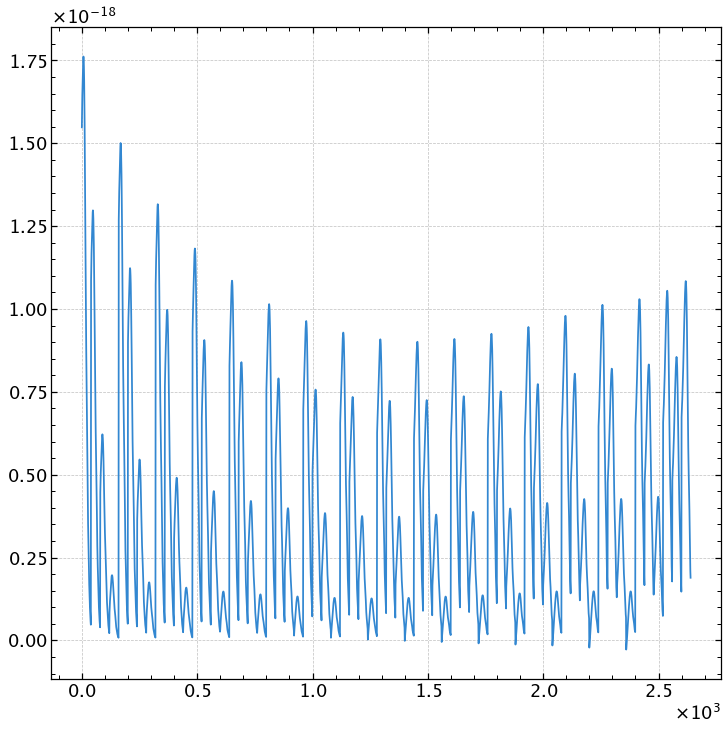

In [14]:
dCdm_dmh = datagen_AGN_dmh.cls_rebin_lkl - datagen_AGN.cls_rebin_lkl
dCdm_dmh = dCdm_dmh /d_dmh

plt.figure(figsize=(12,12))
plt.plot(dCdm_dmh, label='dCdm_dmh')
#plt.xlim(0,100)
#plt.xlim(2400,2700)

add new derivative to J 

In [15]:
J_3 = F.J
print(J_3.shape)
J_3_new = np.append(J_3, dCdm_dmh.reshape(-1,1), axis=1)
print(J_3_new.shape)
cov  = datagen_AGN_dmh.inv_cov_rebin_lkl
print(cov.shape)

(2640, 5)
(2640, 6)
(2640, 2640)


In [16]:
F_new = np.dot(J_3_new.T, np.dot(cov, J_3_new))
print(F_new.shape)
F_new

(6, 6)


array([[ 1.10975435e+05, -1.25109294e+05,  4.21268486e+04,
         4.97509824e+04, -7.56632573e+04, -1.08465232e-09],
       [-1.25109294e+05,  1.65711469e+05, -4.94015113e+04,
        -5.63133468e+04,  9.12939961e+04,  1.32160906e-09],
       [ 4.21268486e+04, -4.94015113e+04,  1.63476215e+04,
         1.93065859e+04, -3.12567751e+04, -4.50505721e-10],
       [ 4.97509825e+04, -5.63133468e+04,  1.93065859e+04,
         2.32001056e+04, -3.96382923e+04, -5.71134285e-10],
       [-7.56632573e+04,  9.12939961e+04, -3.12567751e+04,
        -3.96382923e+04,  1.09815029e+05,  1.56973455e-09],
       [-1.08465232e-09,  1.32160906e-09, -4.50505721e-10,
        -5.71134285e-10,  1.56973455e-09,  2.25422845e-23]])

In [17]:
from scripts.forecast import FisherMatrix
par_vector = np.array([0.25, 0.05, 0.7 , 0.96, 0.8, 2e13 ])
par_names = ['Omega_c', 'Omega_b', 'h', 'n_s', 'sigma_8', 'm_dmh']
F_new_obj =  FisherMatrix(par=par_vector,
                             par_names=par_names,
                             F=F_new,
                             name='normal fisher + halo mass',
                             function=lambda x:x,
                             J=J_3_new,
                             ell_rebin=datagen_AGN_dmh.ell_rebin,)


In [18]:
from numpy import linalg  
cov = linalg.inv(F_new)
errors = np.sqrt(np.diag(cov))
snr = 100*errors/F_new_obj.par
cov
snr

array([12.29704343, 49.24308762, 40.74870487, 21.32721644,  7.29357247,
       23.0487809 ])

In [19]:
from scripts.forecast import ChainConsumer, copy, Optional, pd, List




def fisher_summary(Fs: List[FisherMatrix], par_idx: Optional[List[int]], precision: int = 3, factor: float=1.0) -> list:
    """
    fisher_summary makes a summary of the Fisher matrices, i.e. parameters, their errors, snr, FoM value etc.

    Args:
        Fs (List[FisherMatrix]): List of Fisher matrices
        par_idx (Optional[List[int]]): index  of parameters to report. 
        precision (int, optional): precision . Defaults to 3.
        factor (float, optional): factor to multiply matrices. Defaults to 1.0.

    Returns:
        list: _description_
    """
    list_of_lists = []
    for F in Fs:
        list = []
        print(F.name)
        cov = linalg.inv(F.F*factor)
        errors = np.sqrt(np.diag(cov))
        snr = 100*errors/F.par
        FoM = np.pi/np.sqrt(linalg.det(cov))
        # FoM = np.log10(1/np.sqrt(linalg.det(cov)))
        print(f'FoM: {FoM:.{precision}g}')
        if par_idx is None:
            par_idx = np.arange(len(F.par_names))
        for i, par_name in enumerate(F.par_names):
            # if 'bias' in par_name and not print_biases:
            #    continue
            message = f'{par_name}: {F.par[i]:.{precision}f} +- {errors[i]:.{precision}f} ({snr[i]:.1f} %)'
            print(message)
            list.append([message])
        # if not print_biases:
        #    print('biases are not shown')
        print('-------')
        list_of_lists.append(list)
    return list_of_lists

fisher_summary([F_new_obj], par_idx=None, factor=1., precision=3);



# baseline
# AGN
# FoM: 2.8e+09
# Omega_c: 0.250 +- 0.025 (10.2 %)
# Omega_b: 0.050 +- 0.021 (41.8 %)
# h: 0.700 +- 0.256 (36.6 %)
# n_s: 0.960 +- 0.163 (16.9 %)
# sigma_8: 0.800 +- 0.009 (1.1 %)
# -------
# ======


# normal fisher + halo mass, delta halo mass = 5%
# FoM: 0.00068
# Omega_c: 0.250 +- 0.030 (12.1 %)
# Omega_b: 0.050 +- 0.024 (48.2 %)
# h: 0.700 +- 0.280 (40.0 %)
# n_s: 0.960 +- 0.201 (20.9 %)
# sigma_8: 0.800 +- 0.057 (7.1 %)
# m_dmh: 20000000000000.000 +- 4492424515667.481 (22.5 %)
# -------



# normal fisher + halo mass, delta halo mass = 1%
#FoM: 0.000601
# Omega_c: 0.250 +- 0.031 (12.3 %)
# Omega_b: 0.050 +- 0.025 (49.2 %)
# h: 0.700 +- 0.285 (40.7 %)
# n_s: 0.960 +- 0.205 (21.3 %)
# sigma_8: 0.800 +- 0.058 (7.3 %)
# m_dmh: 20000000000000.000 +- 4609756180696.794 (23.0 %)
# -------

normal fisher + halo mass
FoM: 0.000601
Omega_c: 0.250 +- 0.031 (12.3 %)
Omega_b: 0.050 +- 0.025 (49.2 %)
h: 0.700 +- 0.285 (40.7 %)
n_s: 0.960 +- 0.205 (21.3 %)
sigma_8: 0.800 +- 0.058 (7.3 %)
m_dmh: 20000000000000.000 +- 4609756180696.794 (23.0 %)
-------
